In [1]:
# python
import sys
import importlib
# columnar analysis
from coffea import processor
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, llpnanoaodschema, utilities
importlib.reload(sidm_processor)
importlib.reload(llpnanoaodschema)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()

In [2]:
samples = [
    '2Mu2E_500GeV_5p0GeV_8p0mm',
]
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=1, location_cfg="signal_2mu2e_v10.yaml")

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    schema=llpnanoaodschema.LLPNanoAODSchema,
    maxchunks=1,
    skipbadfiles=True,
)

In [3]:
skimmer = sidm_processor.SidmSkimmer(
    ["2mu2e"],
    ["base"],
)

# save root skim
runner.run(fileset, treename='Events', processor_instance=skimmer)

Output()

Output()

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

writing events to skim_test.root

finished writing

postprocess


{'out': {},
 'processed': {WorkItem(dataset='2Mu2E_500GeV_5p0GeV_8p0mm', filename='root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v10/BsTo2DpTo2Mu2e/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0_v3/LLPnanoAODv2/CutDecayFalse_SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0_v3_part-0.root', treename='Events', entrystart=0, entrystop=4364, fileuuid=b'\xac\xd8R\xc6\xbf\x88\x11\xef\x9b\xf4[\x15\xe6\x9b\xbe\xef', usermeta={'skim_factor': 1.0})},
 'exception': 0}

In [4]:
skim_fileset = fileset.copy()
skim_fileset[samples[0]]['files'] = ["skim_test.root"]

p = sidm_processor.SidmProcessor(
    ["2mu2e"],
    ["base"],
    #verbose=True,
)

output = runner.run(skim_fileset, treename='Events', processor_instance=p)

Output()

Output()

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

/usr/local/lib/python3.12/site-packages/awkward/_nplikes/array_module.py:292: RuntimeWarning: invalid value 
encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))

#--------------------------------------------------------------------------
#                         FastJet release 3.4.3
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Signal not in xs cfg, assuming 1fb


In [5]:
output["out"][samples[0]]["cutflow"]["2mu2e"].print_table()

cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection                 59.8         59.8
pass triggers                22.4         22.4
PV filter                    59.8         22.4
>=2 LJs                      34.3         15.8
2mu2e                        34.1         15.8


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f379ed52b10>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

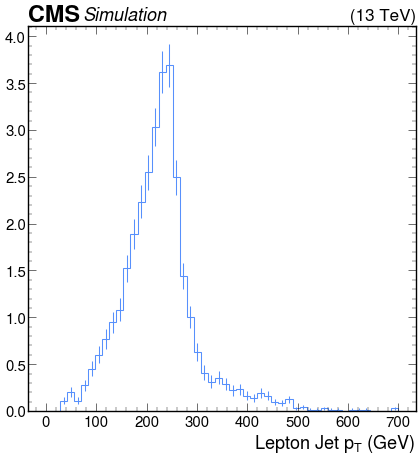

In [6]:
utilities.plot(output["out"][samples[0]]["hists"]["lj_pt"]["2mu2e", ::2j])